# Машинное обучение в биологии

### Семинар 3: Основные понятия и простейшие модели машинного обучения

#### Учимся на геномных эмбеддингах. Работа с веществами в Python. Предсказание параметров веществ по их свойствам.

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set()
sns.set_style("whitegrid")

In [21]:
SEED = 777

### Задача 1: Предсказание растворимости белков

В этой задаче предлагается произвести предсказание растворимости различных белков, используя их физико-химические свойства и белковый состав.

In [2]:
!wget https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/regression/data/solubility_data.csv

--2022-09-29 17:30:38--  https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/regression/data/solubility_data.csv
Resolving data.bioml.ru (data.bioml.ru)... 178.62.218.34
Connecting to data.bioml.ru (data.bioml.ru)|178.62.218.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184108 (180K) [text/csv]
Saving to: ‘solubility_data.csv’

solubility_data.csv 100%[===================>] 179.79K   706KB/s    in 0.3s    

2022-09-29 17:30:39 (706 KB/s) - ‘solubility_data.csv’ saved [184108/184108]



Датасет `solubility_data.csv` загружен за вас, определены `X` и `y`.

In [3]:
sol = pd.read_csv("./solubility_data.csv", header=0, index_col=0)
sol.head(3)

,solubility,protein_sasa,length,molecular_weight,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,reduced_molar_extinction_coefficient,...,A2,B2,C2,A3,B3,C3,A4,B4,C4,TM
uniprot_id,,,,,,,,,,,,,,,,,,,,,
P32643,78,14538.357720,293,33936.5675,40.259795,5.866034,0.310580,0.208191,0.187713,59360,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0
Q46829,70,19283.018950,470,54516.1438,34.295149,5.655559,0.329787,0.214894,0.225532,111160,...,279,1.1,92.5,0,0.0,0.0,0,0.0,0,0
P65556,19,8407.794332,157,17692.5095,54.505159,4.679577,0.286624,0.165605,0.312102,24980,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0


In [6]:
X = sol.iloc[:,1:]
y = sol["solubility"]

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 4:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Осуществите стандартизацию признаков в выборке**.

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Импортируйте модель регрессии k-NN и обучите ее (`model.fit`)**.\
*Вопрос*: на какой части выборки происходит обучение: тренировочной или тестовой?

In [10]:
# import k-nn regression
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

Обучение происходит на тренировочной выборке.

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками RMSE, MAE.

In [11]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f'MSE: train = {train_mse:.3f}, test = {test_mse:.3f}')
print(f'MAE: train = {train_mae:.3f}, test = {test_mae:.3f}')

MSE: train = 590.141, test = 810.694
MAE: train = 19.934, test = 24.684


**Постройте диаграмму рассеяния** предсказываемого значения в зависимости от истинного.

In [12]:
def plot_predicted_actual(Y_test, name, model=None, X_test=None, Y_pred=None):

    if (Y_pred is None) and (model is not None) and (X_test is not None):
        Y_pred = model.predict(X_test)
    
    if Y_pred is None:
        raise ValueError('Y_pred or model with X_test must be provided')

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.scatter(Y_test, Y_pred, alpha=0.3)
    ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)

    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    if name.upper() != name:
        name = name.capitalize()
    ax.set_title(f'{name}: predicted vs measured')

    plt.show()

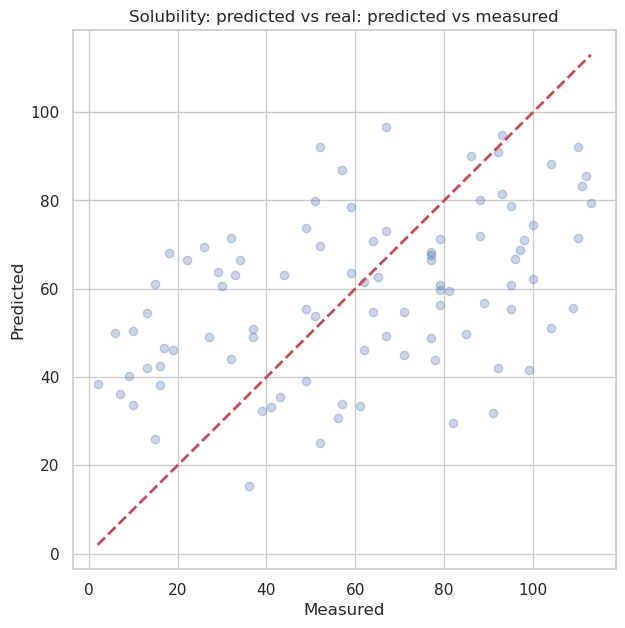

In [13]:
plot_predicted_actual(y_test, 'Solubility: predicted vs real', model, X_test, y_pred_test)

Следующая функция строит график зависимости качества на тестовой и тренировочной выборках от параметра модели.\
Измените помеченную строку в функции так, чтобы ее можно было использовать **для построения графика зависимости качества от количества соседей для модели k-NN**.

In [19]:
from sklearn.metrics import mean_squared_error

def make_qual_chart(X_train, X_test, y_train, y_test, metric=mean_squared_error, init=1, limit=50, step=1):
    train_quals = np.zeros(limit)
    test_quals = np.zeros(limit)
    param_range = np.arange(init, limit + 1, step)
    
    for ind, value in enumerate(param_range):
        ### CHANGE THE NEXT LINE!
        model = KNeighborsRegressor(n_neighbors=value)
        # FIT
        model.fit(X_train, y_train)
        # PREDICT
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        # EVALUATE QUALITY
        train_quals[ind] = metric(y_true=y_train, y_pred=y_train_pred)
        test_quals[ind] = metric(y_true=y_test, y_pred=y_test_pred)
    
    # baseline = metric(y_true=y_test, y_pred=np.full_like(y_test, y_train.mean()))
    
    # TRACING CHART
    plt.figure(figsize=(10, 7))
    plt.plot(param_range, train_quals, label="Train")
    plt.plot(param_range, test_quals, label="Test")
    plt.ylabel(metric.__name__)
    #return param_range, train_quals, test_quals
    # plt.axhline(baseline, color="k", ls="--", lw=1.5, label="Baseline")
    plt.legend()
    plt.show()


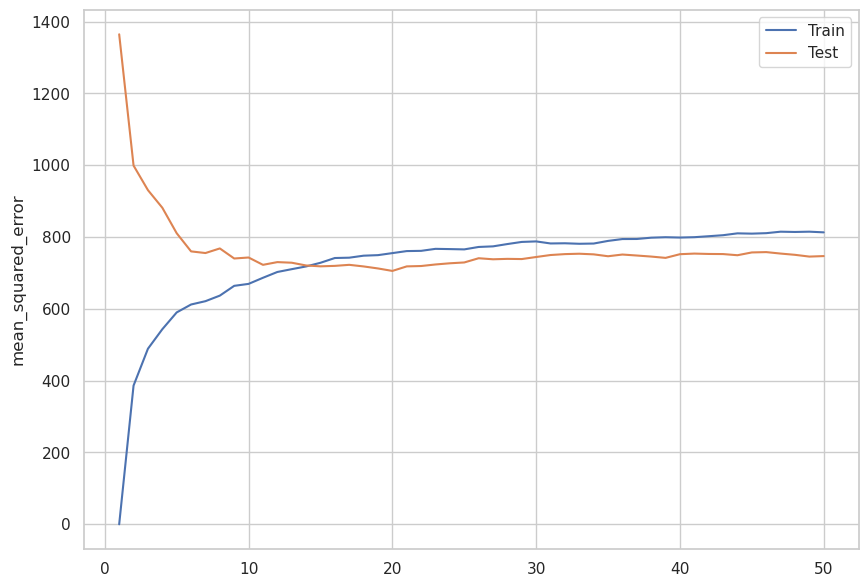

In [20]:
make_qual_chart(X_train, X_test, y_train, y_test)

Сделайте вывод о том, **какое число соседей является оптимальным для данной задачи**. Создайте отдельную модель с оптимальным параметром `n_neighbors` и постройте для нее график зависимости предсказываемого значения от истинного.

Подходящее количество соседей - 20.

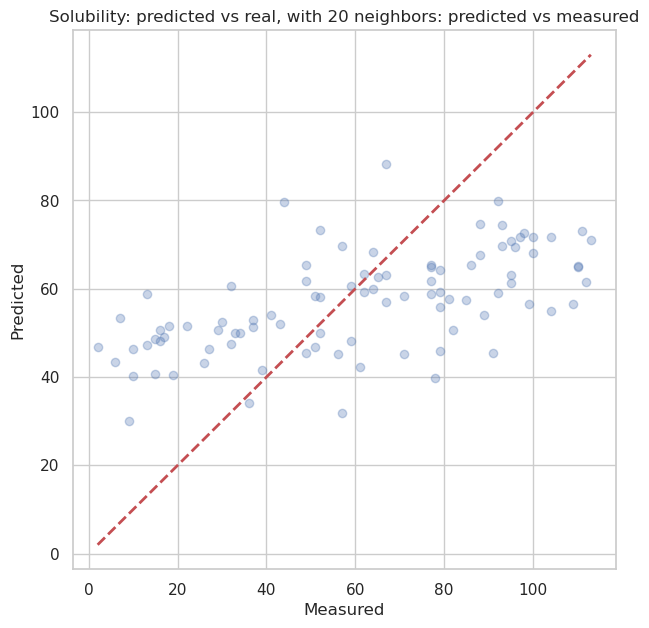

In [22]:
k = 20
model = KNeighborsRegressor(n_neighbors=k)

model.fit(X_train, y_train)

plot_predicted_actual(y_test, 'Solubility: predicted vs real, with 20 neighbors', model, X_test)

Выглядит, как будто модель можно домножить на сонктанту (точки лежат на прямой, но с другим наклоном)

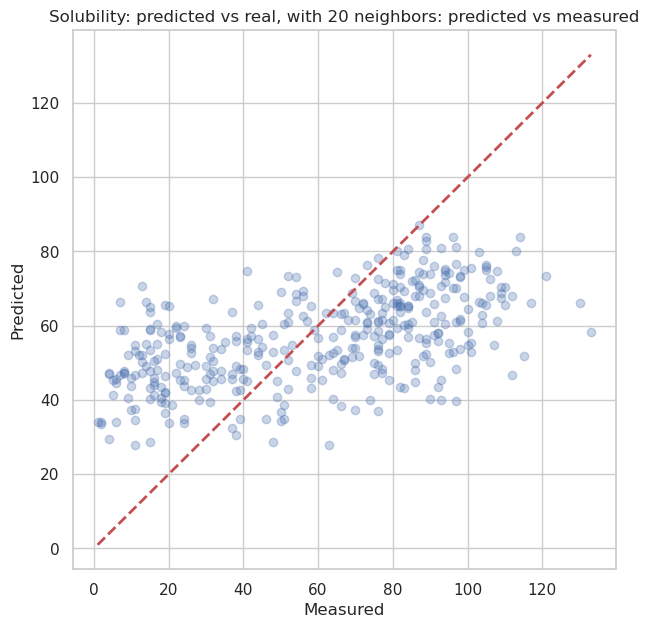

In [23]:
plot_predicted_actual(y_train, 'Solubility: predicted vs real, with 20 neighbors', model, X_train)

Это видно и на тренировочных данных, так что это не подгон :)

**Дополнительно**: сравните kNN-regressor с моделью линейной регрессии на тех же данных.

### Задача 2: Обучение на геномных эмбеддингах

В этой задаче предлагается произвести предсказание изменения экспрессии гена в зависимости от разных однонуклеотидных замен в регуляторном участке ДНК, основываясь на нейросетевых геномных эмбеддингах этого участка.

In [ ]:
!wget https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/data/tfs_deepsea.csv

--2022-09-29 08:49:04--  https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/data/tfs_deepsea.csv
Resolving data.bioml.ru (data.bioml.ru)... 178.62.218.34
Connecting to data.bioml.ru (data.bioml.ru)|178.62.218.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1098058 (1.0M) [text/csv]
Saving to: ‘tfs_deepsea.csv.1’

tfs_deepsea.csv.1   100%[===================>]   1.05M  2.18MB/s    in 0.5s    

2022-09-29 08:49:05 (2.18 MB/s) - ‘tfs_deepsea.csv.1’ saved [1098058/1098058]



Загрузите датасет `tfs_deepsea.csv`, в качестве `y` используйте колонку `Value`, в качестве `X` - все колонки, начиная с девятой.

In [ ]:
tfs = pd.read_csv("tfs_deepsea.csv", header=0)
tfs.head(3)

,Chrom,Pos,Ref,Alt,Value,Confidence,Direction,construction,alt@BRCA1@ds_HepG2_normal,alt@CTCF@ds_HCM_normal,...,ref@GATA3@ds_MCF-7_normal,ref@JunD@ds_H1-hESC_None.1,ref@MafK@ds_K562_normal,ref@NRSF@ds_A549_EtOH_0.02pct,ref@Pol2-4H8@ds_GM12891_normal,ref@Pol2@ds_GM12878_None.2,ref@Pol2@ds_GM12878_None.3,ref@Pol2@ds_GM12878_normal,ref@c-Fos@ds_K562_normal,ref@c-Myc@ds_K562_normal
0,9,104195582,G,C,-0.009418,0.001075,0,ALDOB,0.000056,0.000949,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
1,9,104195582,G,T,-0.212088,0.034187,0,ALDOB,0.000051,0.000857,...,0.00934,0.000637,0.082889,0.007880,0.000568,0.000095,0.000287,0.000147,0.000588,0.001214
2,9,104195700,T,A,0.709840,0.364072,1,ALDOB,0.000089,0.001784,...,0.00292,0.001019,0.100890,0.004289,0.000554,0.000142,0.000209,0.000282,0.001091,0.000891


**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 4:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

**Осуществите стандартизацию признаков в выборке**.

**Импортируйте модель линейной регрессии и обучите ее на соответствующей части выборки (`model.fit`)**.

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками MSE и RMSE. Насколько хороша модель?

Оцените качество графически и с помощью коэффициента корреляции Пирсона.

**Воспользуйтесь моделью kNN-regressor**. Оцените ее качество.

Разбейте X и y на тренировочную и тестовую выборки, **так, как указано в ячейке ниже**. Повторите все шаги, чтобы определить качество регрессии для:
1. Линейной регрессии;
2. kNN-регрессии.

Биологический смысл указанного разбиения: использовать для обучения один промоторный регион при осуществлении предсказания на другом.

In [ ]:
X_train = X[tfs_metadata["construction"] == "ECR11"].values
X_test = X[tfs_metadata["construction"] == "ALDOB"].values
y_train = y[tfs_metadata["construction"] == "ECR11"].values
y_test = y[tfs_metadata["construction"] == "ALDOB"].values

**Сделайте выводы о пригодности модели линейной регрессии для такого анализа**. Есть ли здесь биологический смысл?

### Задача 3: Классификация химических веществ

Повторим задачу из предыдущего семинара, но возьмем для ее решения другую модель: логистическую регрессию.

In [ ]:
!wget https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/data/bace.csv

--2022-09-29 09:15:13--  https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/data/bace.csv
Resolving data.bioml.ru (data.bioml.ru)... 178.62.218.34
Connecting to data.bioml.ru (data.bioml.ru)|178.62.218.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3897767 (3.7M) [text/csv]
Saving to: ‘bace.csv’

bace.csv            100%[===================>]   3.72M  5.55MB/s    in 0.7s    

2022-09-29 09:15:14 (5.55 MB/s) - ‘bace.csv’ saved [3897767/3897767]



Датасет [BACE](http://moleculenet.ai/datasets-1) загружен за вас, определены `X`, `y` и `smiles`.

In [ ]:
bace = pd.read_csv("./bace.csv", header=0)
bace.head(3)

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,3


In [ ]:
X = bace.iloc[:,4:].values
y = bace["Class"].values
smiles = bace["mol"].values

**Разбейте X и y на тренировочную и тестовую выборки**, как в лекции. Соотношение train/test поставьте равным 3:1.\
*Подсказка*: воспользуйтесь функцией `train_test_split`.

**Осуществите стандартизацию признаков в выборке**.

**Импортируйте модель логистической регрессии и обучите ее на соответствующей части выборки (`model.fit`)**.

Для модели `LogisticRegression` укажите параметры `max_iter=200`, `penalty="none"`.

**Получите предсказание на оставшейся выборке**. Оцените его качество метриками из отчета о классификации (`classification_report`) и интегральной метрикой AUC ROC.

**Регуляризация ElasticNet** вносит в функцию потерь линейную комбинацию регуляризаций L1 и L2. Подберите оптимальное соотношение для этих данных. Для определения требуемого параметра (соотношение L1 и L2) воспользуйтесь документацией конструктора модели `LogisticRegression`.

In [ ]:
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

init = 0
limit = 1
step = 0.05

param_range = np.arange(init, limit + step, step)
train_quals = np.zeros(len(param_range))
test_quals = np.zeros(len(param_range))

# baseline = f1_score(y_true=y_test, y_pred=np.full_like(y_test, y_train.mean()))

for ind, value in tqdm(enumerate(param_range), total=len(param_range)):
    # CREATING MODEL (CHANGE THIS LINE!)
    model = LogisticRegression(max_iter=10000, solver="saga", penalty="elasticnet")
    # FIT
    model.fit(X_train, y_train)
    # PREDICT
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # EVALUATE QUALITY
    train_quals[ind] = f1_score(y_true=y_train, y_pred=y_train_pred)
    test_quals[ind] = f1_score(y_true=y_test, y_pred=y_test_pred)

In [ ]:
# TRACING CHART
plt.figure(figsize=(10, 7))
plt.plot(param_range, train_quals, label="Train")
plt.plot(param_range, test_quals, label="Test")
# plt.axhline(baseline, color="k", ls="--", lw=1.5, label="Baseline")
plt.legend()
plt.show()

**Сделайте выводы**.

## Задача 4: Обучение на сгенерированных данных

In [ ]:
import numpy as np
import pandas as pd

Сгенерируем датасет с _здоровыми_ и _больными_ пациентами и данными об _экспрессии_ их генов.


In [ ]:
gene_count = 10000
genes = [f"Gene{ind}" for ind in range(gene_count)]
healthy = pd.DataFrame(np.random.normal(size=(100, gene_count), loc=0, scale=1),
                       columns=genes)
healthy["state"] = "healthy"
diseased = pd.DataFrame(np.random.normal(size=(100, gene_count), loc=0, scale=1),
                        columns=genes)
diseased["state"] = "diseased"
patients = pd.concat([healthy, diseased], axis=0)

In [ ]:
patients

,Gene0,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,...,Gene9991,Gene9992,Gene9993,Gene9994,Gene9995,Gene9996,Gene9997,Gene9998,Gene9999,State
0,1.529391,1.014255,-0.677856,-1.714047,0.320149,0.134628,0.630055,1.193929,0.331707,-0.289807,...,0.199950,-1.040145,0.868727,0.117556,0.084157,1.555072,-1.173177,0.604101,0.002602,H
1,0.877573,-1.857143,0.308792,-0.183361,-0.466325,1.103474,0.848353,1.036432,-0.756934,-0.339856,...,0.965889,-0.795000,-0.992720,0.533527,-0.763717,0.313005,0.988209,-0.273022,-1.557594,H
2,0.901893,-0.319947,-0.553359,-0.421082,0.388007,0.591844,-0.733813,0.512512,1.127015,-1.156327,...,0.057290,-1.600486,-0.413576,0.220014,-0.471751,-0.858201,-0.272750,0.450543,0.277158,H
3,3.368242,0.523476,0.670003,0.286038,1.849226,-0.414640,0.958905,-0.529891,-0.323062,1.552995,...,-0.823255,0.370024,-0.751351,1.588221,0.459690,0.237635,1.075232,0.784458,0.721085,H
4,0.150694,0.133889,-0.825000,-0.845802,-0.428369,1.572794,-0.749911,-0.768920,-1.365887,-0.035653,...,-0.670796,-1.151196,0.655322,0.196059,2.622790,0.456224,-0.385750,-1.397108,-0.698283,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.597411,0.408063,-0.788861,0.577543,-1.045190,-0.810603,-0.205111,-2.048265,1.781589,0.751556,...,-0.344598,-1.328481,-0.672177,0.497124,0.448152,0.011227,2.354065,0.424140,-0.717599,D
96,-0.673818,0.396731,-0.255417,-0.367822,1.893482,0.177508,0.445613,1.079955,-0.504922,-0.930385,...,0.529042,0.858541,0.520908,1.096308,1.533732,-0.094394,-0.518913,-0.154322,0.550603,D
97,0.401149,-0.380043,0.502841,-0.835978,-0.106970,1.343870,-1.116521,-1.010059,0.606624,1.190096,...,1.399937,-0.357309,2.009514,1.159233,-0.126914,0.004023,-0.323366,-0.338984,-1.136042,D
98,-0.459351,0.225624,0.724269,0.685111,-0.172752,0.703707,0.494737,1.199367,-0.814784,0.398802,...,-0.198302,-0.321098,-0.037649,-0.787498,0.257670,0.980257,-0.357917,-1.227620,0.014098,D


In [ ]:
X = patients.drop("state", axis=1)
y = patients["state"] == "diseased"

Произведем отбор 10 _наилучших_ признаков:

In [ ]:
top_k = 10

diffs = X[y].mean(axis=0) - X[~y].mean(axis=0)
top = np.abs(diffs).sort_values(ascending=False)[0:top_k]
genes = top.index

In [ ]:
X_selected = X[genes]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score

y_train_pred = model.predict_proba(X_train)[:,1]

train_rocauc = roc_auc_score(y_score=y_train_pred, y_true=y_train)
train_prauc = average_precision_score(y_score=y_train_pred, y_true=y_train)
train_accuracy = accuracy_score(y_pred=y_train_pred > 0.5, y_true=y_train)

print("Train quality:")
print(f"ROCAUC: {train_rocauc:.03f}")
print(f"PRAUC: {train_prauc:.03f}")
print(f"Accuracy: {train_accuracy:.03f}")

Train quality:
ROCAUC: 0.874
PRAUC: 0.879
Accuracy: 0.800


In [ ]:
y_test_pred = model.predict_proba(X_test)[:,1]

train_rocauc = roc_auc_score(y_score=y_test_pred, y_true=y_test)
train_prauc = average_precision_score(y_score=y_test_pred, y_true=y_test)
train_accuracy = accuracy_score(y_pred=y_test_pred > 0.5, y_true=y_test)

print("Test quality:")
print(f"ROCAUC: {train_rocauc:.03f}")
print(f"PRAUC: {train_prauc:.03f}")
print(f"Accuracy: {train_accuracy:.03f}")

Test quality:
ROCAUC: 0.885
PRAUC: 0.883
Accuracy: 0.750


Исходя из процедуры генерации, различий между группами быть не должно. Тем не менее, модель показывает неплохое качество на тесте. Объясните природу наблюдаемого эффекта.

Теперь **воспользуемся встроенным в scikit-learn методом выбора признаков**:

In [ ]:
from sklearn.feature_selection import SelectKBest, SelectFdr, f_classif

In [ ]:
X_selected = SelectKBest(f_classif, k=10).fit_transform(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_base.py:99: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning,


**Повторите обучение модели** на признаках, отобранных стандартным методом sklearn. Объясните полученный результат.

**Дополнительно**: Воспользуйтесь методом `SelectFdr` для отбора признаков. Что такое FDR?

---